# Programming Machine Learning Lab
# Exercise 8

**General Instructions:**

1. You need to submit the PDF as well as the filled notebook file.
1. Name your submissions by prefixing your matriculation number to the filename. Example, if your MR is 12345 then rename the files as **"12345_Exercise_9.xxx"**
1. Complete all your tasks and then do a clean run before generating the final PDF. (_Clear All Ouputs_ and _Run All_ commands in Jupyter notebook)

**Exercise Specific instructions::**

1. You are allowed to use only NumPy and Pandas (unless stated otherwise). You can use any library for visualizations.


### Part 1

In this part, we will code a perceptron. It is simply a single node neural network which processes weighted inputs and performs binary classification. 


- Read up on perceptron algorithm. (https://en.wikipedia.org/wiki/Perceptron#Learning_algorithm_for_a_single-layer_perceptron).
- Create an object class caled perceptron. 
- Train your perceptron using the following different datasets and report the test losses.
- Create an animation of how the decision boundary is updated over the iterations. *You can use any library for this viualization*
- We will use toy datasets for the problem. Set aside 20% of samples from each dataset for testing.
    - **Xlin_sep.npy** and **ylin_sep.npy**. This dataset is linearly separable. Run your algorithm for this data, and you should achieve 100% train and test accuracies!
    - **Xlinnoise_sep.npy** and **ylinnoise_sep.npy**. This dataset is not linearly separable and contains noise. Run your algorithm for this data and observe what happens to the decision boundary in the animation. You should get a test accuracy over 80%.
    - **circles_x.npy** and **circles_y.npy**. This dataset is non-linear. Devise a strategy to make the dataset separable linearly. *(Hint: Polynomial Features)*. Plot the decision boundary showing how the two classes are separated.



In [3]:
### Write your code here
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


In [52]:

class Perceptron:
    def __init__(self, x_train, y_train, x_test, y_test, learning_rate=0.05):
        self.x_train = np.c_[np.ones(x_train.shape[0]), x_train]
        self.y_train = y_train
        self.x_test = np.c_[np.ones(x_test.shape[0]), x_test]
        self.y_test = y_test

        self.input_size = self.x_train.shape[1]
        self.weights = np.random.rand(self.input_size)
        self.learning_rate = learning_rate
        
        self.train_loss = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, inputs):
        # Calculate the weighted sum of inputs and add bias
        z = np.dot(inputs, self.weights)
        # Apply sigmoid function for logistic regression
        return self.sigmoid(z)

    def compute_loss(self, inputs, labels):
    # Convert labels and predictions to NumPy arrays
        labels = np.array(labels)
        predictions = np.array(self.predict(inputs))

        # Calculate the loss using binary logistic regression formula
        loss = np.sum(labels * np.log(predictions) + (1 - np.array(labels)) * np.log(1 - predictions))
        return -loss


    def compute_gradient(self, inputs, labels):
        # Calculate the gradient using the provided formula
        predictions = self.predict(inputs)
        gradient = np.dot(inputs.T, (labels - predictions))
        return -gradient / len(inputs)

    def fit(self, epochs=20, verbose=True):
        for epoch in range(epochs):
            # Compute the gradient using the entire training set
            gradient = self.compute_gradient(self.x_train, self.y_train)
            # Update weights and bias using gradient descent
            self.weights -= self.learning_rate * gradient # Exclude the bias term from weight update

            loss = self.compute_loss(self.x_train, self.y_train)
            self.train_loss.append(loss)
            correct_predictions = 0
            for inputs, label in zip(self.x_test, self.y_test):
                prediction = self.predict(inputs)
                # Round predictions to 0 or 1
                prediction = 1 if prediction > 0.5 else 0
                correct_predictions += (prediction == label)

            acc = correct_predictions / len(self.y_test)
            if (verbose):
                print(f'epoch {epoch} of {epochs} - loss = {loss}, Training accuracy = {acc}')
    
    def test(self):
        # Calculate and print accuracy on test data
        correct_predictions = 0
        for inputs, label in zip(self.x_test, self.y_test):
            prediction = self.predict(inputs)
            # Round predictions to 0 or 1
            prediction = 1 if prediction > 0.5 else 0
            correct_predictions += (prediction == label)

        accuracy = correct_predictions / len(self.y_test)
        return accuracy

    def plot_decision_boundary(self):
        # Plot decision boundary
        plt.figure(figsize=(8, 6))
        plt.scatter(self.x_train[:, 1], self.x_train[:, 2], c=self.y_train, cmap='viridis', edgecolors='k', label='Training Data')

        # Generate predictions for a range of points along the x and y axes
        x_min, x_max = self.x_train[:, 1].min() - 1, self.x_train[:, 1].max() + 1
        y_min, y_max = self.x_train[:, 2].min() - 1, self.x_train[:, 2].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        inputs = np.c_[np.ones_like(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]
        predictions = np.array([self.predict(inp) for inp in inputs])
        predictions = predictions.reshape(xx.shape)

        plt.contour(xx, yy, predictions, levels=[0.5], colors='k', linewidths=2)
        
        plt.title('Decision Boundary After Training')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

training based on the X_lin_sep


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 10000

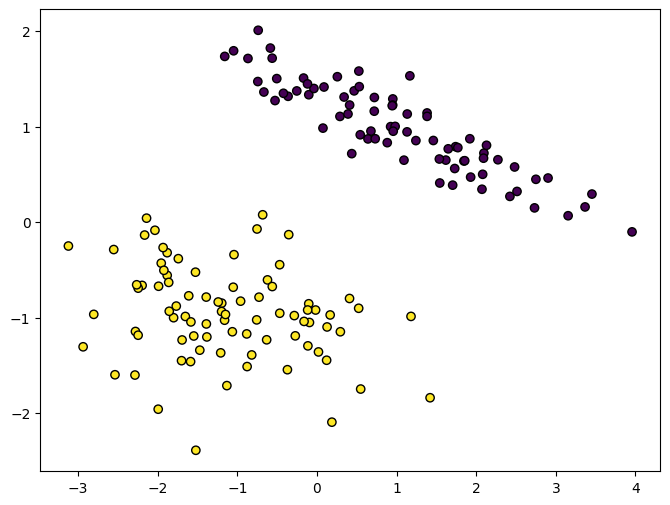

In [53]:
X_lin_sep = np.load('Xlin_sep.npy')
y_lin_sep = np.load('ylin_sep.npy')
y_lin_sep = [1 if x == 1 else 0 for x in y_lin_sep]
# Linearly non-separable dataset with noise
X_lin_noise_sep = np.load('Xlinnoise_sep.npy')
y_lin_noise_sep = np.load('ylinnoise_sep.npy')
y_lin_noise_sep = [1 if x == 1 else 0 for x in y_lin_noise_sep]
# Non-linear dataset (circles)
X_circles = np.load('circles_x.npy')
y_circles = np.load('circles_y.npy')
y_circles = [1 if x == 1 else 0 for x in y_circles]


# first doing it for the noise-less one
print('training based on the X_lin_sep')
x_train, x_test, y_train, y_test = train_test_split(X_lin_sep, y_lin_sep, test_size=0.2, random_state=42)
perceptron = Perceptron(x_train, y_train, x_test, y_test, learning_rate=0.02)
perceptron.fit(epochs=100, verbose=False)
perceptron.plot_decision_boundary()




training based on the X_lin_noise_sep


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 10000

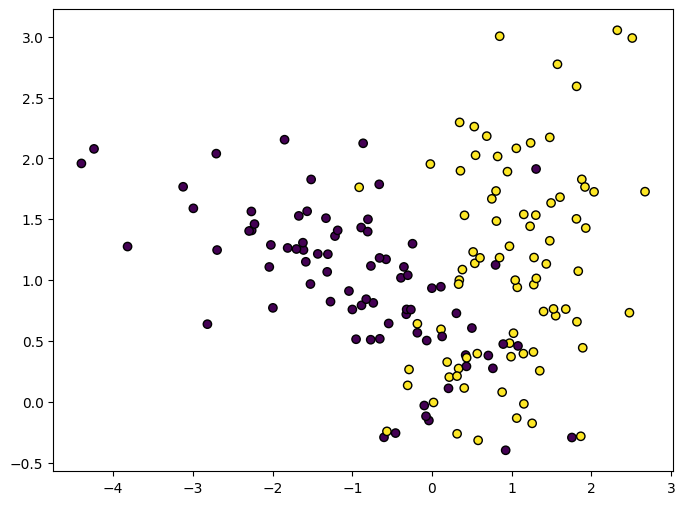

In [54]:
# first doing it for the noisy one
print('training based on the X_lin_noise_sep')
x_train, x_test, y_train, y_test = train_test_split(X_lin_noise_sep, y_lin_noise_sep, test_size=0.2, random_state=42)
perceptron = Perceptron(x_train, y_train, x_test, y_test)
perceptron.fit(epochs=1, verbose=False)
perceptron.plot_decision_boundary()


training based on the X_circles


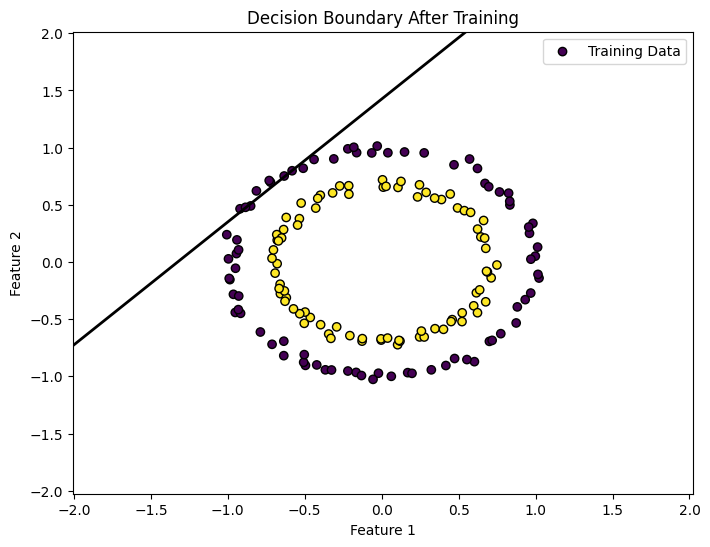

In [19]:
# first doing it for the noise-less one
print('training based on the X_circles')
x_train, x_test, y_train, y_test = train_test_split(X_circles, y_circles, test_size=0.2, random_state=42)
perceptron = Perceptron(x_train, y_train, x_test, y_test)
perceptron.fit(epochs=500, verbose=False)
perceptron.plot_decision_boundary()


In [40]:
def polynomial_features(X, degree=2, include_bias=True):
    n_samples, n_features = X.shape
    output_features = []

    for d in range(1, degree + 1):
        for i in range(n_features):
            output_features.append(X[:, i] ** d)

    if include_bias:
        output_features.append(np.ones((n_samples, 1)))

    return np.column_stack(output_features)

# Non-linear dataset (circles) with poly features
X_circles = np.load('circles_x.npy')
y_circles = np.load('circles_y.npy')
y_circles = [1 if x == 1 else 0 for x in y_circles]

print('training based on the X_circles_poly')
x_train, x_test, y_train, y_test = train_test_split(X_circles, y_circles, test_size=0.2, random_state=42)
x_train = polynomial_features(x_train, degree=2)
x_test = polynomial_features(x_test, degree=2)

perceptron = Perceptron(x_train, y_train, x_test, y_test)
perceptron.fit(epochs=1, verbose=False)
perceptron.plot_decision_boundary()

training based on the X_circles_poly
(5,)


ValueError: operands could not be broadcast together with shapes (5,) (4,) (5,) 

### Part 2

In this part, we will create a feed-forward neural network

- Load the MNIST classification dataset using sklearn. Split the data into train and test datasets (80-20 split).
- Implement a neural network with forward propagation and backpropagation **from scratch**.
- Use Stochastic Gradient Descent as the optimizer and Cross-entropy as Loss.
- You model class should be flexible in terms of
    - Number of layers
    - Number of hidder parameters.
    - Activation function for each layer (SoftMax, ReLU or tanh)
- Now create a training function that takes the neural network and training data as inputs and updates the weights of the network. This function should also take in the learning rate, number of epochs, and batchsize as input.
- Try out different hyperparameters to train your model and try to achieve >90% test accuracy. 

*Hints:*
- Flatten the MNIST data from 2D to 1D.
- Use *He weights initialization* for weights. *The He initialization calculates the starting weights as randomly generated matrices using a Gaussian probability distribution with a mean of 0.0 and a standard deviation of sqrt(2/n), where n is the number of inputs to the layer.*

In [2]:
### Write your code here

### Part 3

**MLPClassifier**

In this part, we will use the same dataset from Part 2 and implement a multi-layer perceptron using sklearn. 
- Import the necessary classes and perform a 5-fold cross-validation by defining a hyperparameter grid for the MLP classifier. 
- You need to read about the hyperparameters supported by the function and define a grid for them.
- Perform a random search on the grid that you have chosen.
- Report a single test accuracy with the best found hyperparameters

**Note: you can use any sklearn function for this and the next part**

In [3]:
### Write your code here
from sklearn.neural_network import MLPClassifier

**MLPRegressor**

In this part, we would repeat the all steps taken for MLPClassifier. However, we will try to learn a regression model using MLPRegressor instead. In the end calculate the accuracy of MLPRegressor by using the *test_accuracy_regressor* function provided.

**Note: The target output needs to be numerical in this case.**

In [4]:
### Write your code here
from sklearn.neural_network import MLPRegressor

In [1]:
## Sample code
import numpy as np 
y_true = np.arange(10)
y_pred = np.array([-0.1,1.2,1.9,2.9,4.5,6,20,4.5,6.9,8.5])

def test_accuracy_regressor(y_true,y_pred):
    ### the function assumes both inputs to be 1-D arrays
    assert y_true.shape==y_pred.shape, f"y_true and y_pred needs to be of same shape, but found y_true: {y_true.shape} and y_pred:{y_pred.shape}"
    assert len(y_pred.shape)==1, f'inputs should be 1-D, but found them as {len(y_pred.shape)}-D'

    return np.sum((np.round(y_pred,0).astype(int))==y_true)/y_pred.size

test_accuracy_regressor(y_true,y_pred)

0.5

Comment on the performance of MLP Regressor vs MLP Classifier